# Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# using encoding for utf-8 error

df = pd.read_csv('Diwali_Sales_Data.csv', encoding = 'unicode_escape')

In [3]:
df.shape

(11251, 15)

In [5]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [9]:
# drop unrelated/blank column
df.drop(['Status', 'unnamed1'], axis=1, inplace = True)

In [15]:
pd.isnull(df).sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [16]:
# drop null value
df.dropna(inplace= True)

In [17]:
df.shape

(11239, 13)

In [18]:
# change data type
df['Amount'] = df['Amount'].astype('int')

In [19]:
df['Amount'].dtype

dtype('int32')

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [34]:
#rename column
df.rename(columns={'Marital_Status':'Shaadi'},inplace=True)

In [35]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Shaadi,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877


In [36]:
df.describe()

,User_ID,Age,Shaadi,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [38]:
#use describe() for specfic column

df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory Data Analysis(EDA)

## Gender

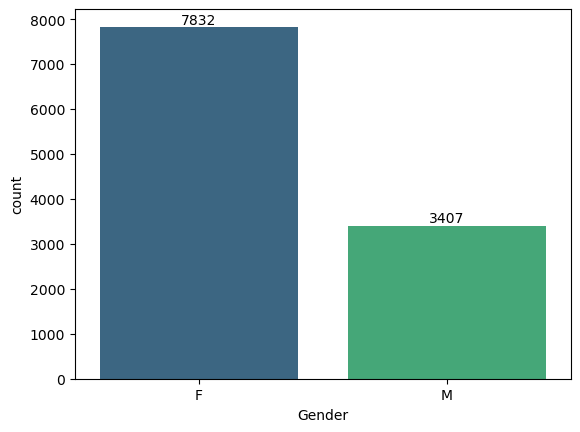

In [43]:
ax = sns.countplot(x= 'Gender', data =df, palette = "viridis")

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

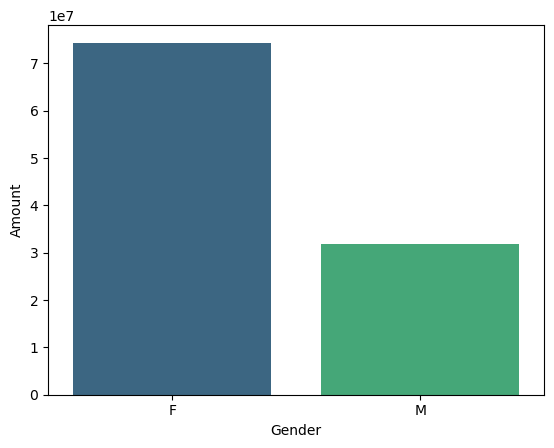

In [46]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender', y= 'Amount', data = sales_gen,palette = "viridis")

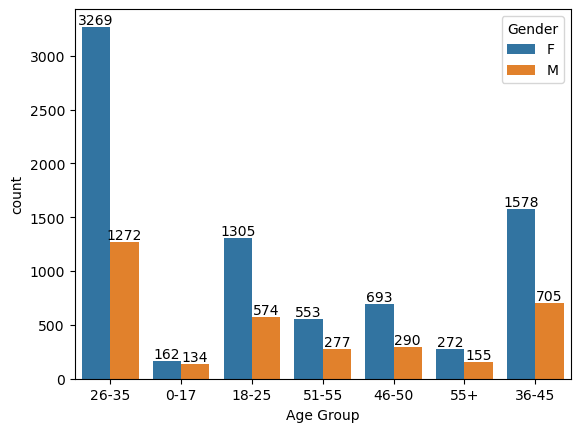

In [47]:
ax = sns.countplot(data = df, x = 'Age Group' , hue = 'Gender') # hue means dividing on the gender basis

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

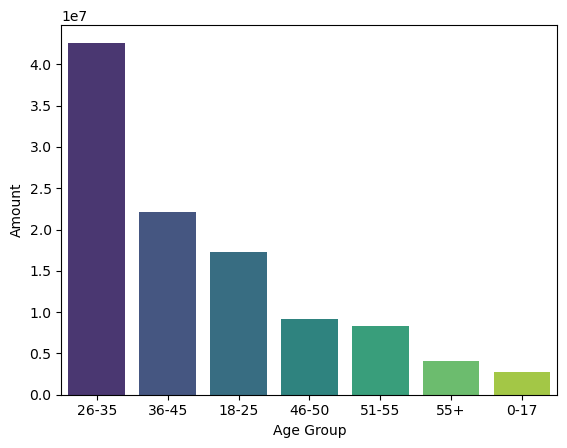

In [52]:
# Total amount vs Age Group

sales_age = df.groupby(['Age Group'], as_index= False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x= 'Age Group', y= 'Amount', data = sales_age,palette = "viridis")

# sales

<Axes: xlabel='State', ylabel='Orders'>

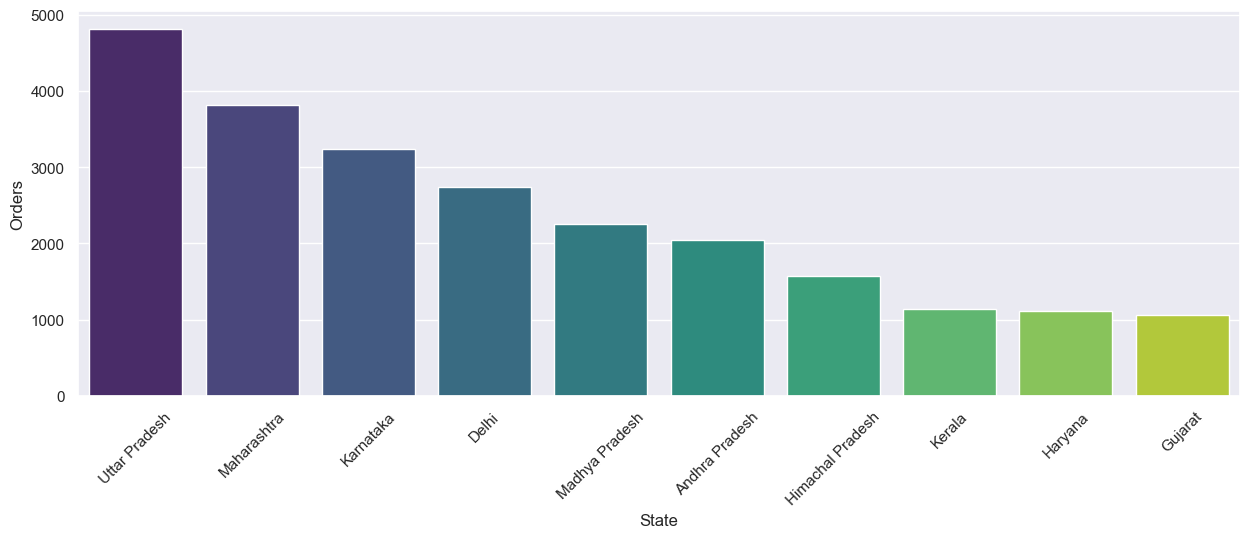

In [64]:
# Total number of orders from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by ='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation = 45)
sns.barplot(data = sales_state, x = 'State', y= 'Orders',palette = "viridis")

<Axes: xlabel='State', ylabel='Amount'>

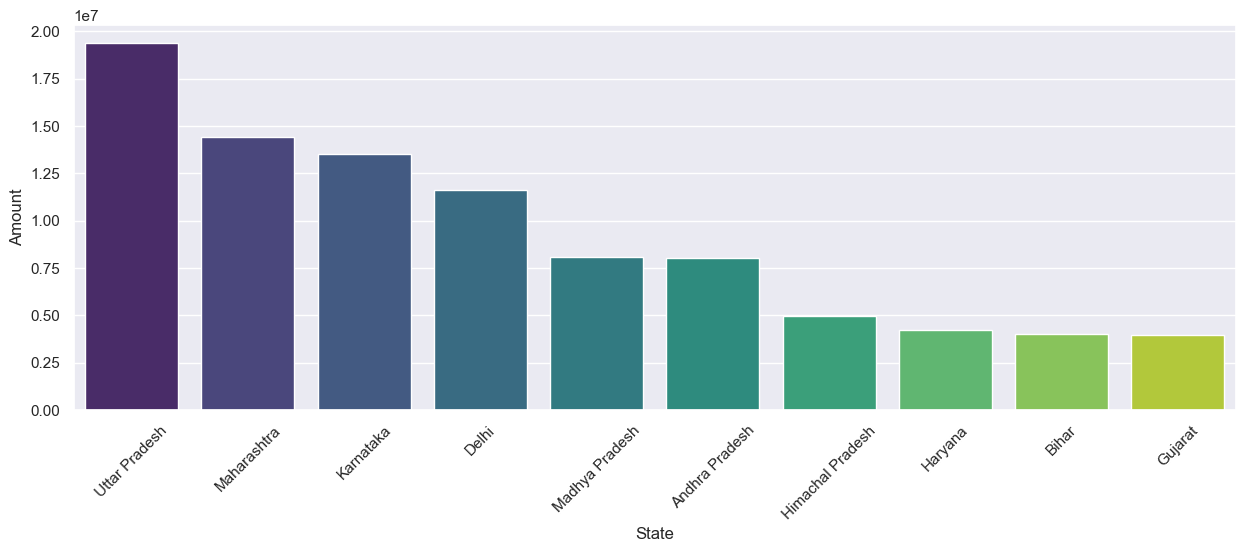

In [67]:
# Total Amount/sales from  top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
plt.xticks(rotation = 45)
sns.barplot(data = sales_state, x = 'State', y= 'Amount',palette = "viridis")

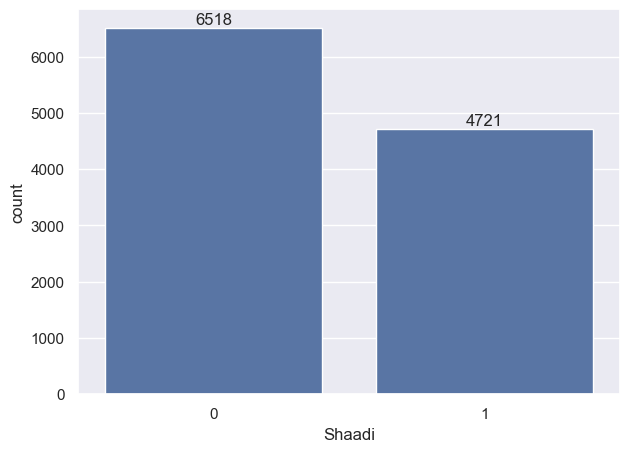

In [73]:
ax = sns.countplot(data = df , x = 'Shaadi')

sns.set(rc={'figure.figsize':(3,5)})
for bars in ax.containers:
        ax.bar_label(bars)

<Axes: xlabel='Shaadi', ylabel='Amount'>

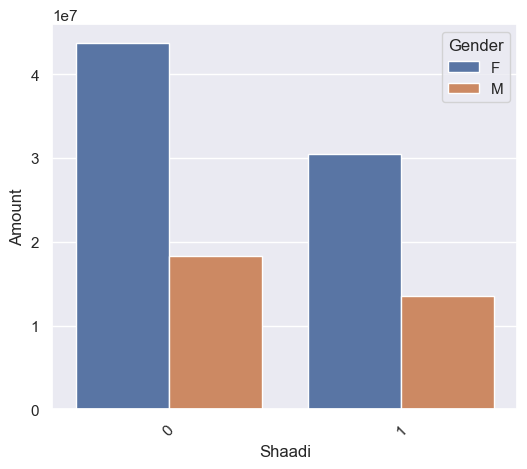

In [77]:
sales_state = df.groupby(['Shaadi', 'Gender'], as_index=False)['Amount'].sum().sort_values(by ='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
plt.xticks(rotation = 45)
sns.barplot(data = sales_state, x = 'Shaadi', y= 'Amount', hue='Gender')